# First Steps

* [Notes](#Notes)
    * [Playback](#Playback)
    * [Pitch](#Pitch)
    * [Duration](#Duration)
        * [Shorthand](#Entering-durations-in-shorthand)
    * [Explicit Offset](#Explicit-Offset)
    * [Notation](#Notation)
* [Chords](#Chords)

* [Enharmonic Spelling](#Enharmonic-Spelling)

* [Glissandi](#Glissandi)
* [Chain: a sequence of notes/chords](#Chain)
    * [Operations on Chains (inverse, reverse, ...)](#Operations-on-Chains)
    * [Offset](#Offset)
* [Voices](#Multiple-Voices)

In [1]:
from maelzel.core import *
from pitchtools import f2m

## Notes

The simplest note possible is just a pitch.

The duration remains undetermined and will be set at the latest moment, either for display or for playback. Notice that although the note is shown as a quarter note the duration is still `None`

duration None


4C
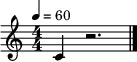

In [6]:
note = Note("C4")
print("duration", note.dur)

note

### Playback

A Note can be played:

In [4]:
note.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset._piano:501.0003, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=60 ...)

It can also be recorded to a soundfile

OfflineRenderer(sr=44100)
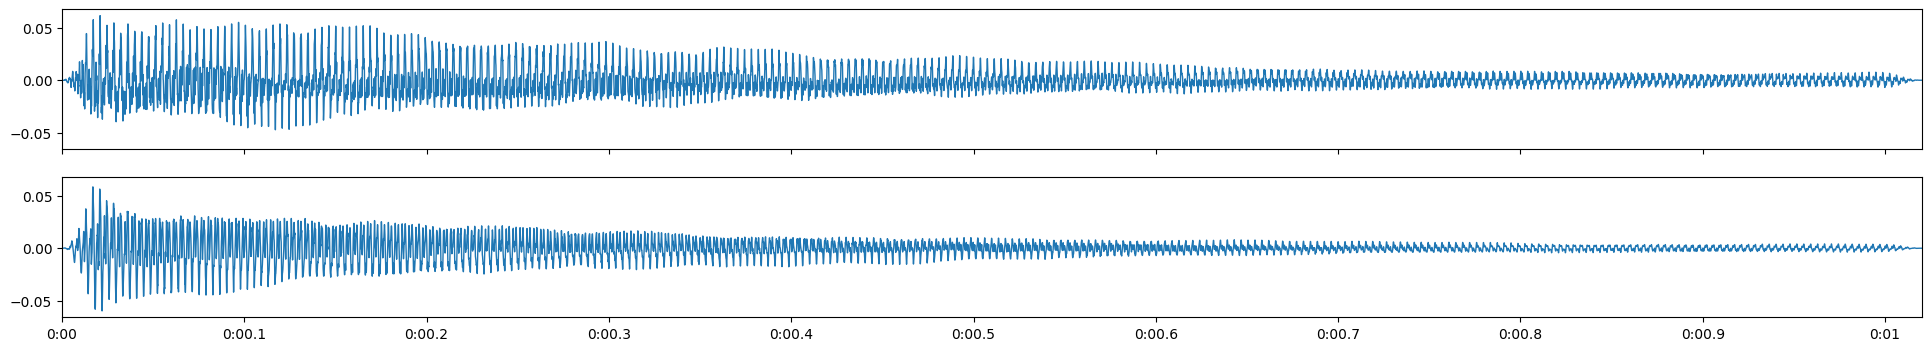

In [7]:
note.rec()

### Pitch

The pitch of a note can be given as a **fractional midinote** or as a **string**. If the pitch deviates from a round 1/8 tone, the cents deviation from the nearest semitone will be shown as a text label (see the 4th note, which is a *E4* 20 cents higher). Pitches can also be given as an absolute frequency and as a frequency deviation from a semitone. **The actual enharmonic representation is not fixed by how the pitch was entered: it depends on the context (surrounding pitches, chords, etc)** (see [Enharmonic Spelling](#Enharmonic-Spelling)).  

**NB**: a `Chain` creates a sequence of notes/chords

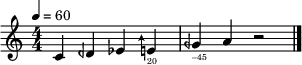

playargs PlayArgs(delay=0, chan=1, gain=1.0, fade=0.02, instr=_piano, pitchinterpol=linear, fadeshape=cos, priority=1, position=-1, sustain=0, transpose=0)


OfflineRenderer(sr=44100)
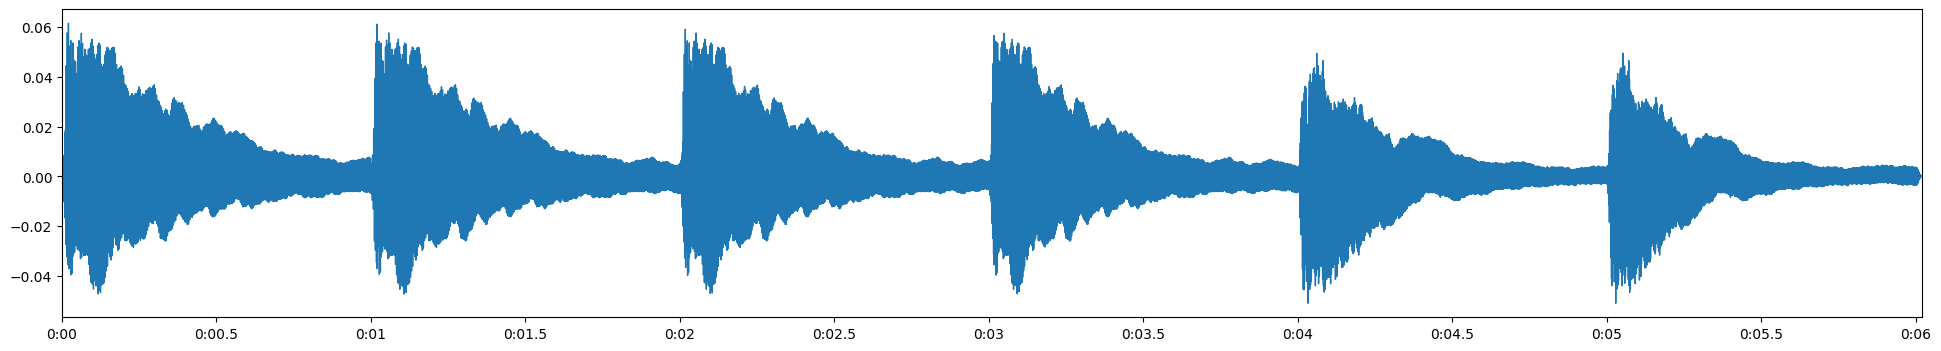

In [2]:
seq = Chain([
    Note(60), 
    Note("c#4+"), 
    Note("4Eb"), 
    Note("4E+20"), 
    Note("4G-10hz"),
    Note("442hz"), 
])
seq.show()
seq.rec(nchnls=1)

#### Transposition

An interval can be added to a note. This will result in a transposed note

4D
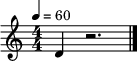

In [4]:
c4 = Note("c4")
c4 + 2

3B+
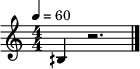

In [5]:
c4 - 0.5

A note can be compared against another note, pitch or string (as long as the string can be interpreted as a notename)

In [5]:
c4 > "b3"

True

In [6]:
c4 < 72

True

### Duration 

**The duration of a Note is given in quarternotes**. This duration is symbolic: its real time duration in seconds depends on tempo.

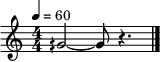

playargs PlayArgs(delay=0, chan=1, gain=1.0, fade=0.02, instr=_piano, pitchinterpol=linear, fadeshape=cos, priority=1, position=-1, sustain=0, transpose=0)


OfflineRenderer(sr=44100)
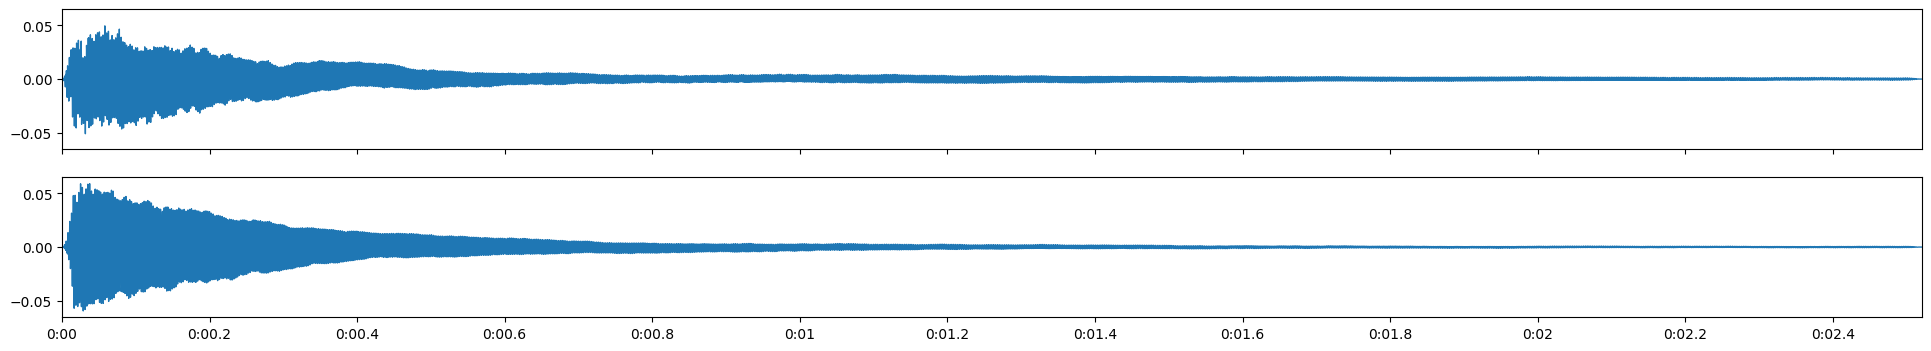

In [6]:
note = Note(67.5, dur=2.5)
note.show()
note.rec()


Chain([4C:0.5♩, 4C>:0.5♩, 4C#:0.5♩, 4D+:0.5♩, 4D#:0.5♩, 4G+27:0.5♩])
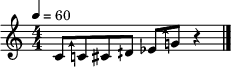

In [4]:
pitches = ("C4", 60.25, "4c#", 62.5, "4Eb", f2m(400))
sequence = Chain([Note(p, 0.5) for p in pitches])

# Outside of jupyter you need to call `.show()` in order to display the object. 
# Inside jupyter you can simply set the object as the last line of a cell
sequence

Instead of `.play` we can use `.rec` to render playback to a soundfile. In the case of this notebook this is helpful since the rendered audio will be embedded in the notebook and the result can be played online. For that sole reason we use `.rec` for playback: in your own personal workflow `.play` is probably more convenient

playargs PlayArgs(delay=0, chan=1, gain=1.0, fade=0.02, instr=_piano, pitchinterpol=linear, fadeshape=cos, priority=1, position=-1, sustain=4, transpose=0)


OfflineRenderer(sr=44100)
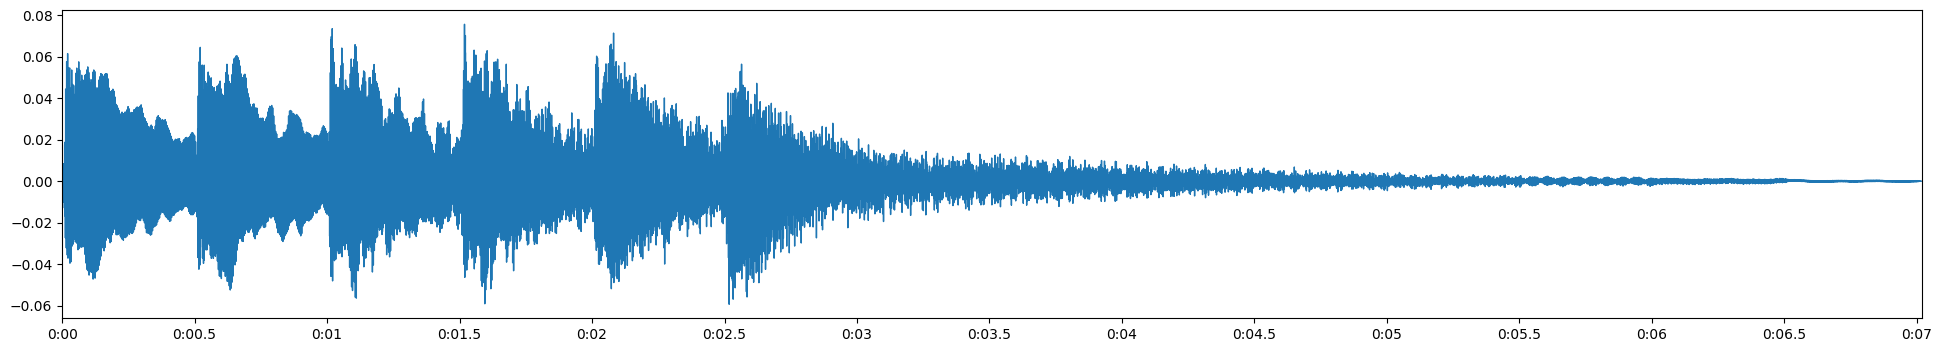

In [5]:
sequence.rec(nchnls=1, sustain=4)

Any duration can be given. For example, **triplets**:

Chain([4C:0.333♩, 4C>:0.333♩, 4C#:0.333♩, 4D+:0.333♩, 4D#:0.333♩, 4G+27:0.333♩])
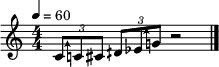

In [6]:
Chain([Note(p, 1/3) for p in pitches])

Test different durations. The quantization engine tries to find the best representation for each rhythm

Notice how, for nested tuplets, the quantization algorithm decides to place the smaller tuplet (in these cases the triplet) as the outter tuplet. This makes the rhythms easier to read.

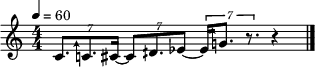

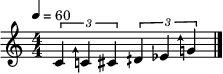

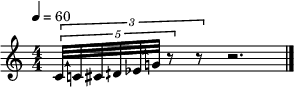

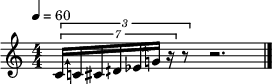

In [7]:
durations = [
    3/7,
    F(2, 3),
    F(1, 5)*F(1, 3),
    F(1, 3)*F(2, 7),
]

for duration in durations:
    chain = Chain([Note(p, duration) for p in pitches])
    chain.show()

#### Entering durations in shorthand

When entering notes there are some **shortcuts** possible. For example, when using a string to set the pitch of a note, it is possible to set the duration as well by using the following formats:

    <pitch>:<duration in quarternotes>   (example: 4Db:1.5)
    <pitch>/<musical duration>           (example: 4Db/4.)
    
* In the first format, the duration is given as **quarternotes**, so 0.5 is an eighth note, 0.25 is a 16th note, etc.
* In the second format, the duration is given as **symbol**: 4 represents a quarter-note, 8 represents an 8th-note, 16 a 16th-note, etc. Dots can also be added

Chain([4C:0.5♩, 4C:0.5♩, 4C:0.5♩, 4D:0.75♩, 4D:0.75♩, 4D:0.75♩, 4E:0.25♩, 4E:0.25♩, 4E:0.25♩])
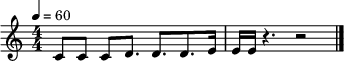

In [8]:
Chain([
    Note("4C", 0.5),
    Note("4C:0.5"), 
    Note("4C/8"),
    
    Note("4D", 0.75),
    Note("4D:.75"),
    Note("4D/8."),
    
    Note("4E", 0.25),
    "4E:.25",           # The string is enough to construct a note within a Chain
    "4E/16", 
])


### Unset duration

Many attributes of a note, like its duration, can be *unset* (set to `None`). When there is a need to determine a duration, for example for notation or playback, a **default duration of 1 quarternote** will be used or **the duration might depend on the context of the note**. For example, within a sequence **a note with unset duration will take the duration from the start time of the next note** if the next note has an explicit start time

In the following example a note *n* with an unset duration is created. When shown independently a default duration of 1 is assumed. When notated in the context of a sequence of notes, the duration is determined by the start time of the following note (if it has a set start time)

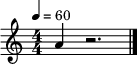

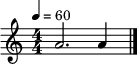

In [9]:
n = Note("4A")
n.show()

Chain([n, n.clone(offset=3)]).show()

### Explicit Offset

Notes can have an **explicit start time** called **offset**. This can be useful when there is a need to **sync** with other time-based media, such as an audio file, a video, etc. For notation the quantizer will find the most appropriate subdivision according to your settings (the configuration of notational complexity will be discused later). Playback will respect your given start time, independently of the rounding effects regarding notation.

#### Beat Time vs Absolute Time

All time indications are given in *beat time* (also known as *quarternote time*). An offset or a duration express the time in terms of quarternotes. The absolute duration in seconds will depend on the tempo at the given moment

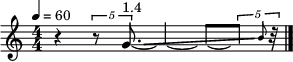

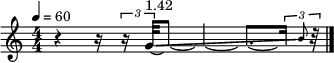

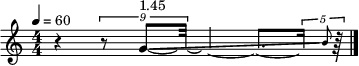

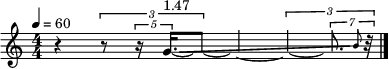

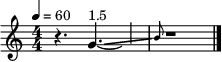

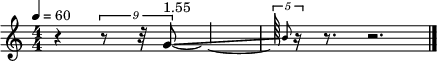

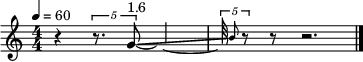

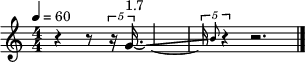

In [10]:
offsets = [1.4, 1.42, 1.45, 1.47, 1.5, 1.55, 1.6, 1.7]
for offset in offsets:
    n = Note("4G", dur=2.5, offset=offset, gliss="4B", label=str(offset))
    n.show()    

### Notation

Many **purely notational aspects** of a note/chord can be customized. A note can have an articulation, a size, color, etc. These are not dealt with in depth here: they are mentioned only to show somecase some of the possibilities 

4F>:1.4♩:offset=0.2:symbols=[Color(value=#0000f0), Notehead(square, size=1.3), Articulation(kind=accent)]
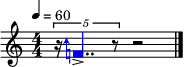

In [11]:
n = Note("4F+25", offset=1/5, dur=7/5)
n.addSymbol('color', '#0000f0')
n.addSymbol('notehead', 'square', size=1.3)
n.addSymbol('articulation', 'accent')
n

4G:0.8♩:offset=0.2:symbols=[Notehead(slash, color=green), Articulation(kind=snappizz)]
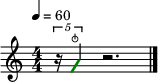

In [13]:
n = Note("4G", dur=F(4, 5), offset="1/5")
n.addSymbol(symbols.Notehead(shape='slash', color='green'))
n.addSymbol('articulation', 'snappizz')
n

------

## Chords

A Chord is very similar to a Note but it allows multiple pitches. 


>    A chord contains one or more Notes. These are interpreted as pitches and have no individual 
>    duration (the `.dur` attribute is always `None`). On any other aspects they are fully fledged 
>    notes and can be customized individually

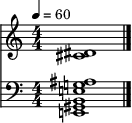

OfflineRenderer(sr=44100)
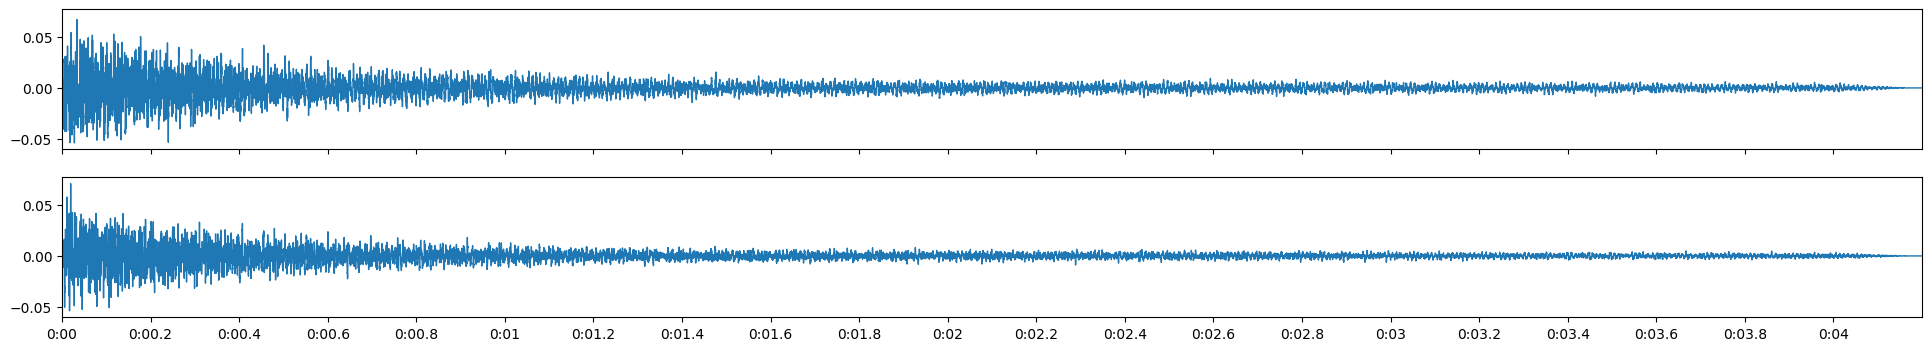

In [11]:
setScoreStruct(timesig='4/4', tempo=60)
ch = Chord("E2 G#2 B2 E3 G3 Bb3 Db4 Eb4", dur=4)
ch.show()
ch.rec("snd/stravinsky.ogg", fade=(0, 0.2))

The same chord distributed explicitely between two voices

Notice how the enharmonic spelling algorithm chooses a **different spelling** here in comparison to the example above. This is because above **the chord is is distributed between two systems**, whereas in this example the chords are **manually split** and **unaware** of each other (the spelling algorithm works at the part level)

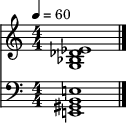

In [12]:
left = Chord("E2 G#2 B2 E3", 4)
right = Chord("G3 Bb3 Db4 Eb4", 4)
score = Score([right, left])
score.show()

A Chord is made out of Notes, so **each note can be given own parameters**.

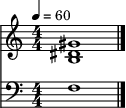

playargs PlayArgs(delay=0, chan=1, gain=1.0, fade=0.02, instr=_piano, pitchinterpol=linear, fadeshape=cos, priority=1, position=-1, sustain=0, transpose=0)


OfflineRenderer(sr=44100)
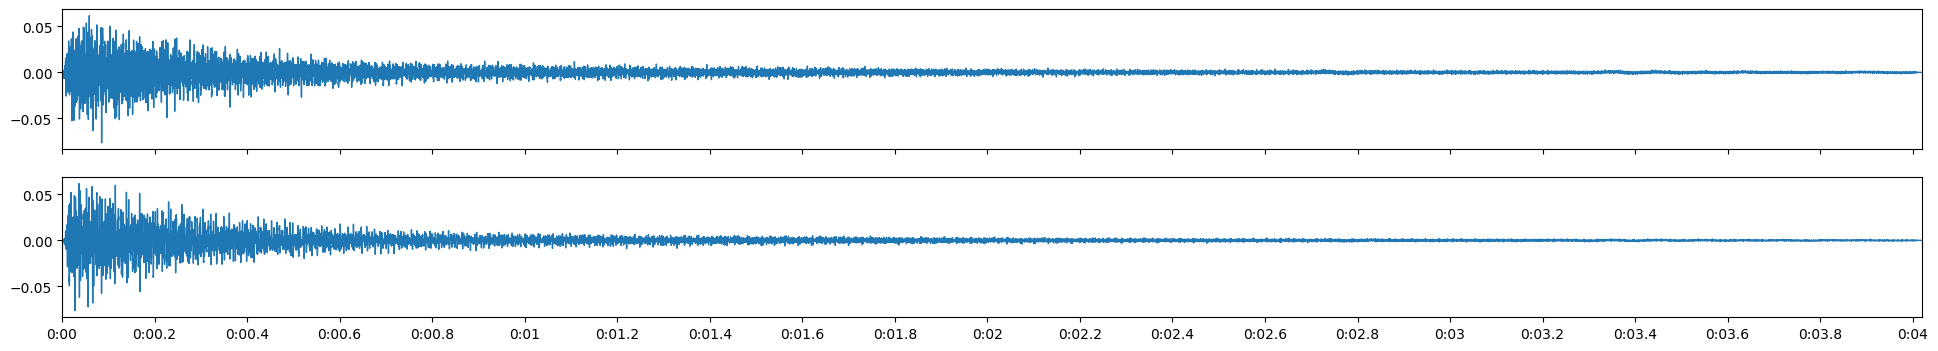

In [16]:
chord = Chord("3f 3b 4d# 4g#", dur=4)
chord.show()

chord.rec("snd/tristan.ogg")

playargs PlayArgs(delay=0, chan=1, gain=1.0, fade=0.02, instr=_piano, pitchinterpol=linear, fadeshape=cos, priority=1, position=-1, sustain=0, transpose=0)


OfflineRenderer(sr=44100)
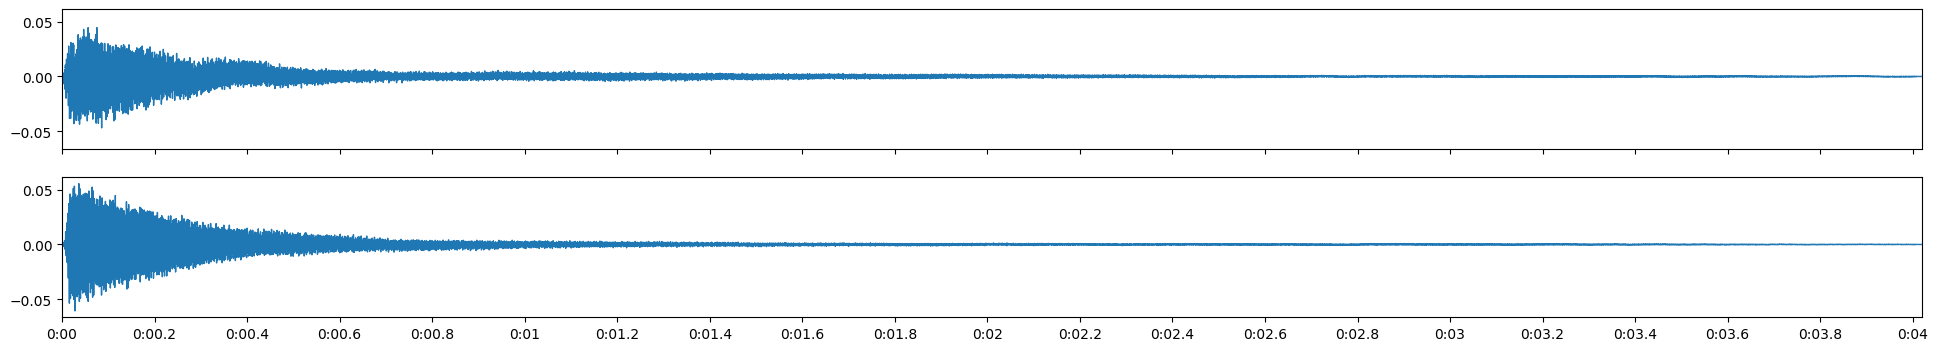

In [17]:
# Make the highest note the loudest and the rest softer
chord = Chord("3f 3b 4d# 4g#", dur=4)
chord[-1].amp = 0.8               

for note in chord[:-1]:
    note.amp = 0.1

chord.rec("snd/chord-with-different-amplitudes.ogg")

## Enharmonic Spelling

A small detour about spelling: in general the enharmonic spelling routine chooses the best spelling for any notes according to the context. Even if the pitch is given as a notename, by default the engine will still insist in using its own spelling. See for example:

‹4Eb 4G 4Bb 4♩›
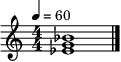

In [15]:
chord = Chord("G4 Bb4 D#4", 4)
chord


In order to force the spelling there are two ways:
    
1. Append a `!` sign to the notename
2. Set the config key `fixStringNotenames` to True. If this is set to True any pitch given as a string is interpreted as being fixed (as if it had an implicit `!` sign)

Notice that fixing a pitch spelling has consequences for the context of that pitch. In the previous case, fixing the spelling of the `D#` modifies the spelling of the rest of the chord. One would need to fix all the pitches in order to force the spelling as is. 

**NB**: there are some enharmonic spellings which are not used by default. These include double alterations in the form of `Dbb` (enharmonic of `C`) or spellings like `E#` (enharmonic of `F`)

Chain([‹4D# 4G 4A# 4♩›, ‹4D# 4G 4Bb 4♩›, ‹4C 4F 4♩›])
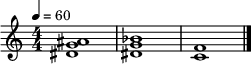

In [26]:
Chain([
    Chord("G4 Bb4 D#4!", 4),
    Chord("G4 Bb4! D#4!", 4),
    Chord("4C 4E#!", 4)
])


## Glissandi

The pitch of a Note or Chord does not need to be static. In each case it is possible to define a **glissando** (the `.gliss` attribute) for the given duration of the event. 

**NB**: you can set an explicit target for a glissando or you can set the `.gliss` attribute to True, in which case the following event in the sequence determines the target pitch of the glissando

4G:gliss=4B
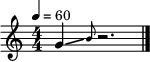

In [4]:
Note("4G", gliss="4B")

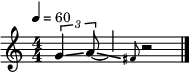

OfflineRenderer(sr=44100)
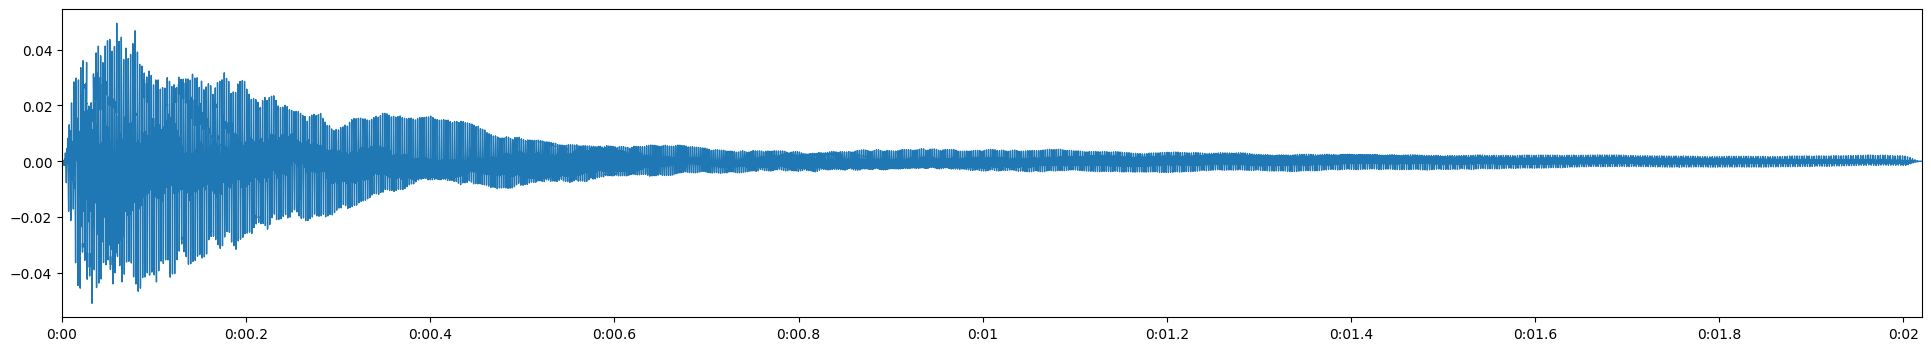

In [5]:
chain = Chain([
    Note("4G", 2/3, gliss=True),
    Note("4A", 4/3, gliss="4F#")
])
chain.show()
chain.rec(nchnls=1)
    

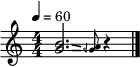

OfflineRenderer(sr=44100)
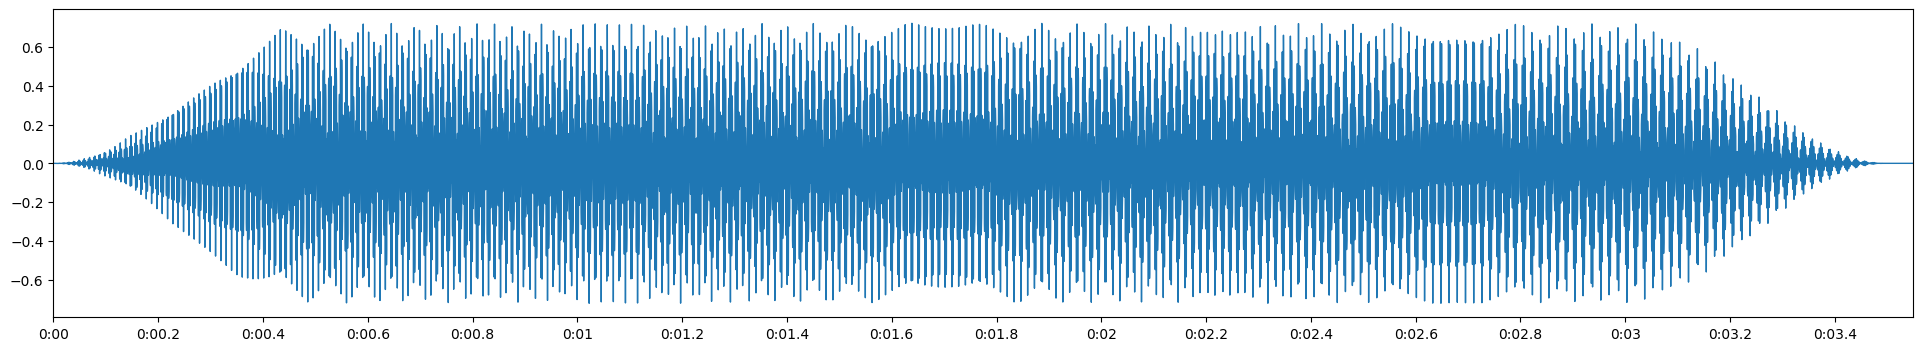

In [12]:
ch = Chord("4G 4B", 3, gliss="4G- 4A")
ch.show()
ch.rec(instr='tri', fade=0.5, nchnls=1, extratime=0.55)

Series of chord glissandi are also possible. Here we render using a triangular wave

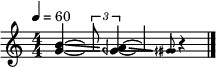

OfflineRenderer(sr=44100)
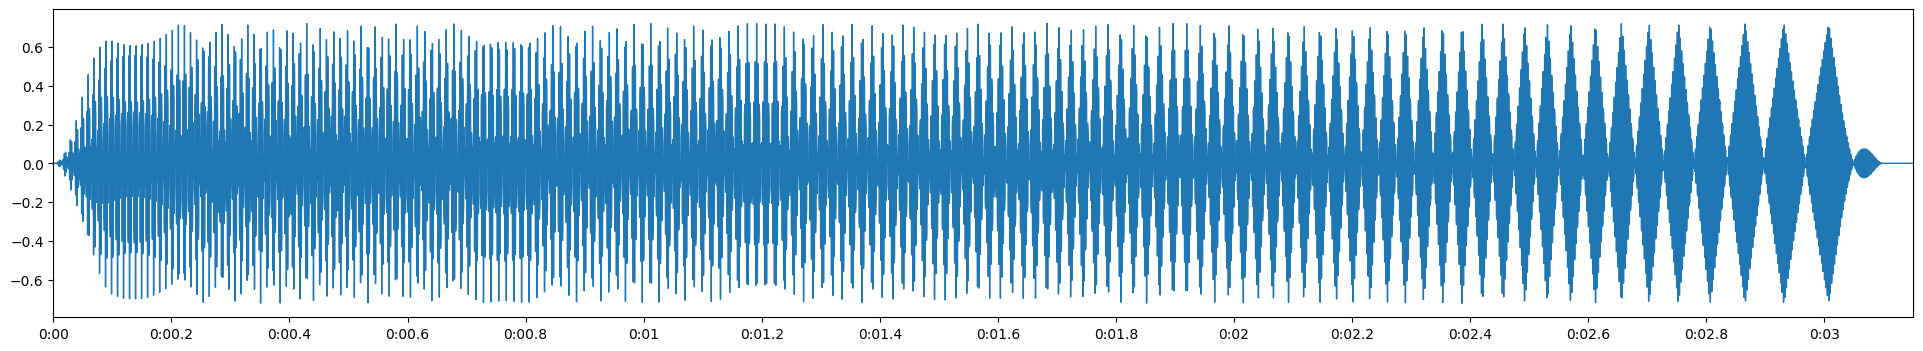

In [7]:
chain = Chain([
    Chord("4G 4B", 4/3, gliss=True),
    Chord("4G- 4A", 5/3, gliss="4G+ 4Ab")
])
chain.show()
chain.rec(instr='tri', nchnls=1, fade=0.1, extratime=0.15)

## Chain

As you have seen in many previous examples, to express a sequence of notes or chords we use a `Chain`

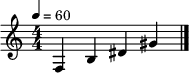

OfflineRenderer(sr=44100)
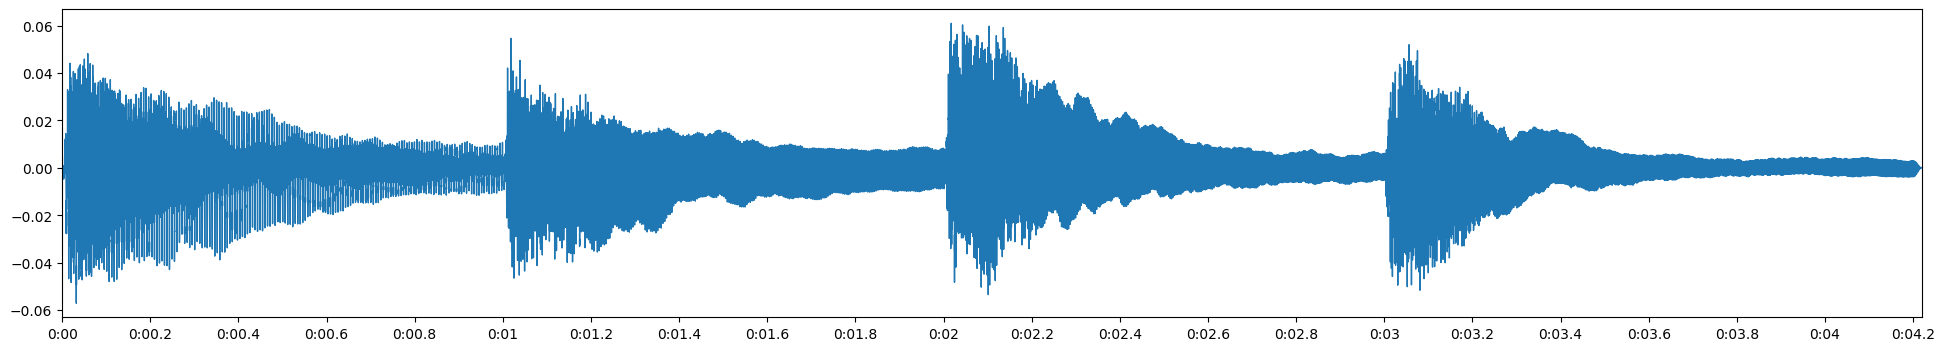

In [8]:
chain = Chain("3f 3b 4Eb 4g#".split())
chain.show()
chain.rec(nchnls=1, sustain=0.2)

Notes within a chain can have **different durations**

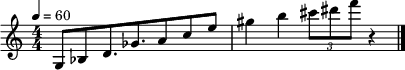

OfflineRenderer(sr=44100)
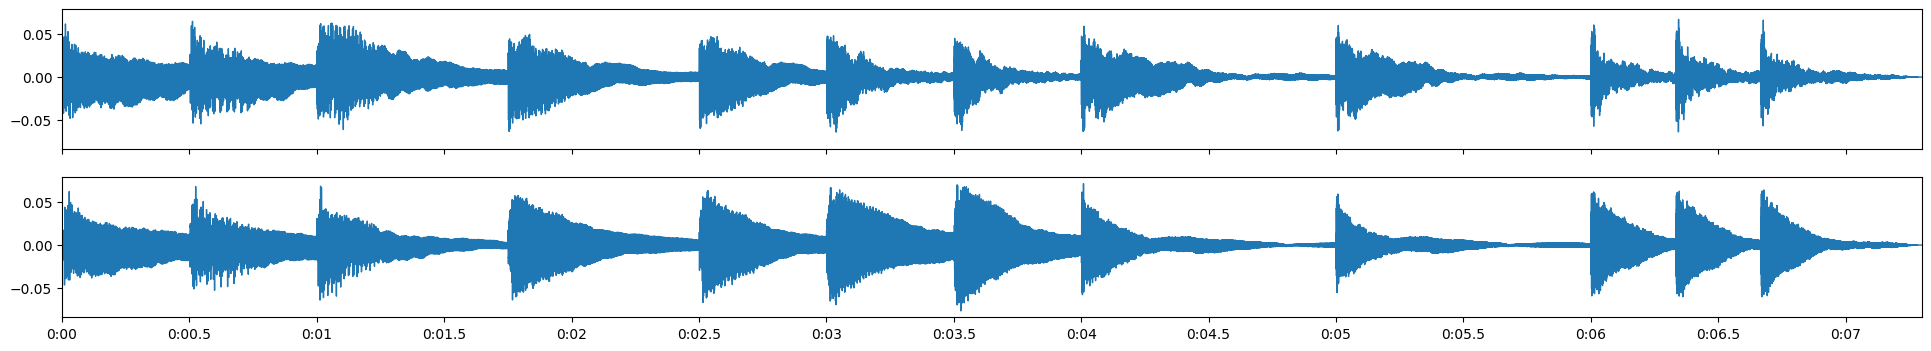

In [9]:
from maelzel.core import *

chain = Chain([
    Note("3G", 0.5),
    Note("3Bb", 0.5),
    Note("4D", 0.75),
    Note("4F#", 0.75),
    Note("4A", 0.5),
    Note("5C", 0.5),
    Note("5E", 0.5),
    Note("5G#", 1),
    Note("5B", 1),
    Note("6C#", 1/3),
    Note("6Eb", 1/3),
    Note("6F", 1/3)
])
chain.show()
# sustain adds an extra duration to the playback. This helps when playing a sequence legato
chain.rec(sustain=0.15, fade=(0, 0.15))

### Operations on Chains

Chains are useful to express operations on a sequence of notes or pitches

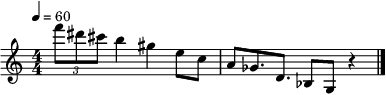

OfflineRenderer(sr=44100)
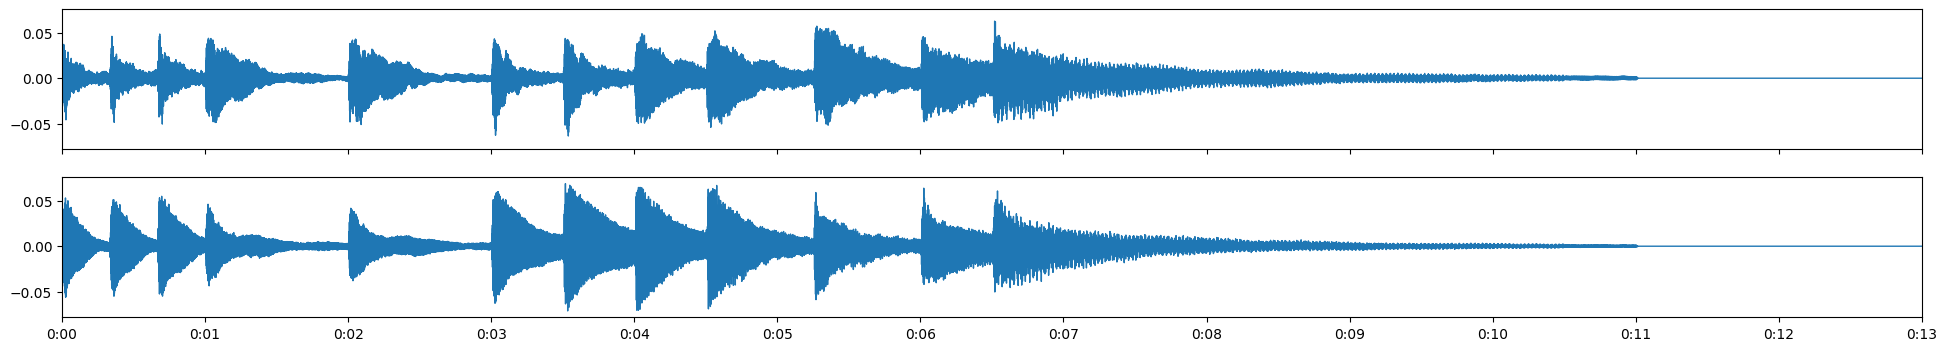

In [18]:
chainReversed = Chain(chain.items[::-1])
chainReversed.show()
# Add sustain to simulate the pedal being down
chainReversed.rec(sustain=4, extratime=2)


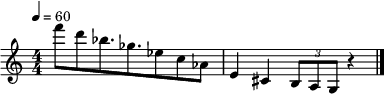

OfflineRenderer(sr=44100)
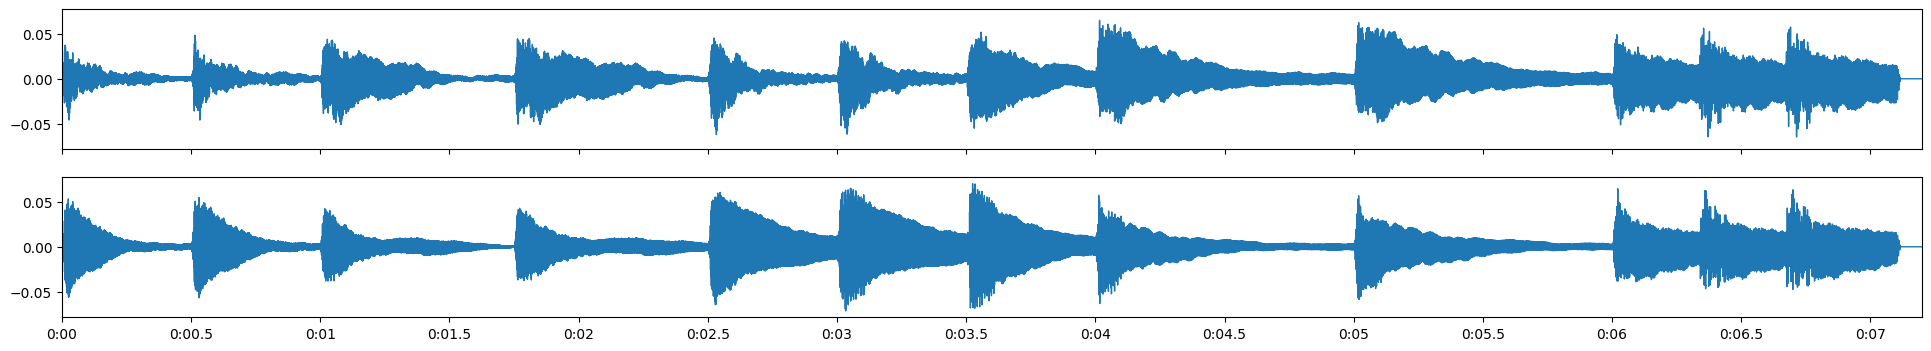

In [19]:
chainInv = chain.invertPitch(pivot="5C")
chainInv.show()
# A little sustain can be used to simulate legato
chainInv.rec(extratime=0.1, sustain=0.1)

### Offset


Within a Chain, **notes are stacked together**, as long as they do not have an **explicit offset**. A gap within items in a chain can be achieved by either an explicit offset or by a Rest

Any start time within a Chain is interpreted as **relative to the beginning** of the chain (a Chain can have also an explicit offset or be placed within another Chain)

Chain([4C, 4D:0.5♩, 4E, 4F:2♩:offset=5])
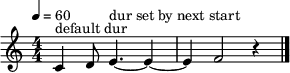

In [27]:
chain = Chain([
    Note("4C", label='default dur'),
    Note("4D", dur=0.5),
    Note("4E", label='dur set by next start'),
    Note("4F", dur=2, offset=5)
])
chain

**A chain itself can have an explicit offset**. The offset of each note within a chain is relative to the beginning of the chain. 

Chain([4C, 4D:0.5♩, 4E, 4F:2♩:offset=5, Chain([4G:1♩:symbols=[Slur(kind=start, uuid=gz7kxjez, linetype=solid)], 4D#:1♩:symbols=[Slur(kind=end, uuid=gz7kxjez, linetype=solid)]])], offset=2)
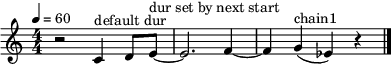

In [5]:
chain1 = Chain([
    "4G:1",
    "4Eb:1"
])
chain1.addSpanner('slur')
chain1[0].label='chain1'

chain2 = Chain([
    Note("4C", label='default dur'),
    Note("4D", dur=0.5),
    Note("4E", label='dur set by next start'),
    Note("4F", dur=2, offset=5),
    chain1
], offset=2)
chain2
    

-----------

## Multiple Voices

A **Voice** is very similar to a Chain. 

* A Voice contains a sequence of non-overlapping objects (notes, chords, rests, clips)
* A Voice can also contain other Chains. 
* A voice has always an offset of 0. 
* A Voice corresponds to a part in a Score - they can be stacked together to create a **Score**.

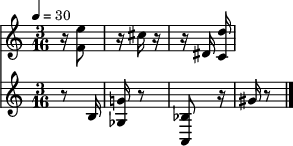

OfflineRenderer(sr=44100)
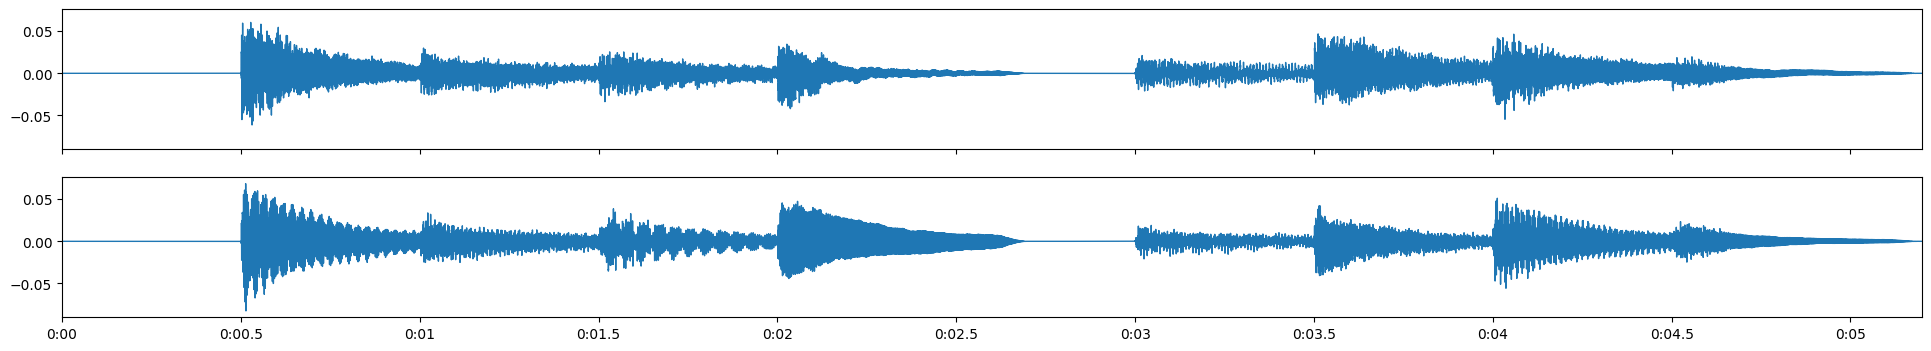

In [9]:
from maelzel.core import *

# It is possible to create notes/chords in a variety of ways

righthand = Voice([
    Rest(0.25), 
    Chord("4F 5E", 0.5),
    Rest(0.25),
    Note("5C#", .25),
    Rest(.5),
    "4Eb:.25",    
    "4C,5D:.25"
])

lefthand = Voice([
    "R/8",
    "3B/16",
    "3F#,4G:.25",
    "R/8",
    "2A,3Bb/8",
    "R/16",
    "4G#/16"
])

score = Score([righthand, lefthand])

# Create a score structure with a time signature of 3/16 with tempo ♪. = 40
setScoreStruct(timesig=(3, 16), tempo=30)

score.show()
score.rec(sustain=0.1, fade=(0, 0.1))